**SENTIMENT ANALYSIS ON DATASET: AMAZON ALEXA REVIEWS**

importing necessary libraries

In [1]:
import nltk
nltk.download()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


**reading the tsv file**

In [2]:
data = pd.read_csv("amazon_alexa.tsv",sep="\t")
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


**understanding the dataset**

In [3]:
data.keys()
#these are the different columns present in our dataset

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [4]:
data.shape
#gives the size of dataset

(3150, 5)

In [5]:
#shows the first 20 rows of the dataset
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [6]:
data.describe()
#from the mean we can say that reviews are mostly positive

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
corr_matrix = data.corr()
corr_matrix['feedback'].sort_values(ascending=False)
#there is high correlation between rating and feedback

feedback    1.000000
rating      0.861968
Name: feedback, dtype: float64

In [8]:
data['feedback'].value_counts()
#imbalanced dataset

1    2893
0     257
Name: feedback, dtype: int64

In [9]:
data.info()
#gives brief info about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [10]:
#check if there is any missing values in dataset
data.isna()

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


In [11]:
#check if there is any null values in dataset
data.isnull()

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


**till now we conclude that there are no missing values and no null values present in dataset**

**plots for visualising how data features related in the dataset**

In [12]:
#feedback is our target variable
data.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

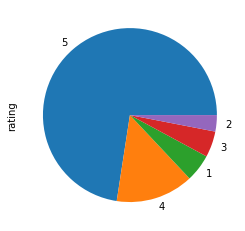

In [13]:
#visualising the result
data['rating'].value_counts().plot.pie()

In [ ]:
#we can see majority of our ratings are postive and very less negative ratings

In [14]:
data.groupby('feedback').describe()

rating                                             
           count      mean       std  min  25%  50%  75%  max
feedback                                                     
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0

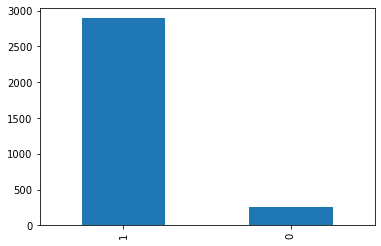

In [15]:
data['feedback'].value_counts().plot.bar()

In [16]:
data.groupby('variation').describe()

rating                                          \
                              count      mean       std  min  25%  50%  75%   
variation                                                                     
Black                         261.0  4.233716  1.339838  1.0  4.0  5.0  5.0   
Black  Dot                    516.0  4.453488  1.027660  1.0  4.0  5.0  5.0   
Black  Plus                   270.0  4.370370  1.158391  1.0  4.0  5.0  5.0   
Black  Show                   265.0  4.490566  0.996635  1.0  4.0  5.0  5.0   
Black  Spot                   241.0  4.311203  1.247764  1.0  4.0  5.0  5.0   
Charcoal Fabric               430.0  4.730233  0.683994  1.0  5.0  5.0  5.0   
Configuration: Fire TV Stick  350.0  4.591429  0.990751  1.0  5.0  5.0  5.0   
Heather Gray Fabric           157.0  4.694268  0.647108  2.0  5.0  5.0  5.0   
Oak Finish                     14.0  4.857143  0.363137  4.0  5.0  5.0  5.0   
Sandstone Fabric               90.0  4.355556  0.997875  1.0  4.0  5.0  5.0   
Walnut Finish                   9.0  4.888889  0.333333  4.0  5.0  5.0  5.0   
White                          91.0  4.142857  1.464934  1.0  4.0  5.0  5.0   
White  Dot                    184.0  4.423913  1.047857  1.0  4.0  5.0  5.0   
White  Plus                    78.0  4.358974  1.184032  1.0  4.0  5.0  5.0   
White  Show                    85.0  4.282353  1.278129  1.0  4.0  5.0  5.0   
White  Spot                   109.0  4.311927  1.222454  1.0  4.0  5.0  5.0   

                                  feedback                                     \
                              max    count      mean       std  min  25%  50%   
variation                                                                       
Black                         5.0    261.0  0.865900  0.341414  0.0  1.0  1.0   
Black  Dot                    5.0    516.0  0.930233  0.255002  0.0  1.0  1.0   
Black  Plus                   5.0    270.0  0.896296  0.305442  0.0  1.0  1.0   
Black  Show                   5.0    265.0  0.932075  0.252092  0.0  1.0  1.0   
Black  Spot                   5.0    241.0  0.867220  0.340043  0.0  1.0  1.0   
Charcoal Fabric               5.0    430.0  0.972093  0.164898  0.0  1.0  1.0   
Configuration: Fire TV Stick  5.0    350.0  0.920000  0.271682  0.0  1.0  1.0   
Heather Gray Fabric           5.0    157.0  0.987261  0.112504  0.0  1.0  1.0   
Oak Finish                    5.0     14.0  1.000000  0.000000  1.0  1.0  1.0   
Sandstone Fabric              5.0     90.0  0.933333  0.250841  0.0  1.0  1.0   
Walnut Finish                 5.0      9.0  1.000000  0.000000  1.0  1.0  1.0   
White                         5.0     91.0  0.813187  0.391921  0.0  1.0  1.0   
White  Dot                    5.0    184.0  0.934783  0.247583  0.0  1.0  1.0   
White  Plus                   5.0     78.0  0.897436  0.305352  0.0  1.0  1.0   
White  Show                   5.0     85.0  0.870588  0.337647  0.0  1.0  1.0   
White  Spot                   5.0    109.0  0.889908  0.314450  0.0  1.0  1.0   

                                        
                              75%  max  
variation                               
Black                         1.0  1.0  
Black  Dot                    1.0  1.0  
Black  Plus                   1.0  1.0  
Black  Show                   1.0  1.0  
Black  Spot                   1.0  1.0  
Charcoal Fabric               1.0  1.0  
Configuration: Fire TV Stick  1.0  1.0  
Heather Gray Fabric           1.0  1.0  
Oak Finish                    1.0  1.0  
Sandstone Fabric              1.0  1.0  
Walnut Finish                 1.0  1.0  
White                         1.0  1.0  
White  Dot                    1.0  1.0  
White  Plus                   1.0  1.0  
White  Show                   1.0  1.0  
White  Spot                   1.0  1.0

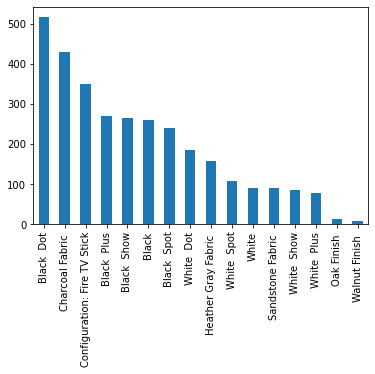

In [17]:
data['variation'].value_counts().plot.bar()
#black dot most popular and walnut finish least popular from the graph

**CLEANING OF DATA**

**data contains the following**

#punctuation
#emojis
#capital letters

**CONVERTING TEXT TO LOWER CASE**

In [22]:
import string
data['cleaned_reviews'] = data['verified_reviews'].str.lower()
data['cleaned_reviews']
#data

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: cleaned_reviews, Length: 3150, dtype: object

**REMOVE PUNCTUATION**

In [24]:
#print(string.punctuation)
#removing punctuation
data['cleaned_reviews'] = data['cleaned_reviews'].str.replace("[!#$%&'()*+,-./:;<=>?@[\]^_`{|}~]",'')
data['cleaned_reviews']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: cleaned_reviews, Length: 3150, dtype: object

**REMOVE EMOTICONS**

In [25]:
#removing emoticons
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

data['cleaned_reviews'] = data['cleaned_reviews'].apply(lambda x :deEmojify(x) )
data['cleaned_reviews'] 

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: cleaned_reviews, Length: 3150, dtype: object

In [ ]:
#tokenisation
#remove stopwords
#stemming/lemmatization
#countVectoriser

**TOKENISATION**

In [27]:
from nltk import word_tokenize
data['text']=data['cleaned_reviews'].apply(word_tokenize)
data['text']
#data['text'][3148]

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: text, Length: 3150, dtype: object

**REMOVING STOPWORDS**

In [28]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(x):
    i=0
    for w in x:
        if w not in stop_words:
           # print(w)
            x[i]=w
            i+=1
    x=x[:i]
    return x
            
            
data['text'] = data['text'].apply(remove_stopwords)
#data['text'][3148]

['complaint',
 'sound',
 'quality',
 'isnt',
 'great',
 'mostly',
 'use',
 'commands',
 'though',
 'another',
 'dot',
 'hooked',
 'stereo',
 'system',
 'play',
 'music',
 'couple',
 'friends',
 'dot',
 'dont',
 'mind',
 'audio',
 'quality',
 'youre',
 'bothered',
 'kind',
 'thing',
 'id',
 'go',
 'full',
 'size',
 'echo',
 'make',
 'sure',
 'hook',
 'larger',
 'speakers']

**LEMMATIZATION**

In [29]:
#lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lemmatize(s):

     s = [wnl.lemmatize(word) for word in s]
     s=list(set(s))
     return s

#dataset = dataset.assign(col_lemma = dataset.col.apply(lambda x: lemmatize(x))
data['text'] = data['text'].apply(lambda x:lemmatize(x))
data['text']


0                                            [love, echo]
1                                                 [loved]
2       [sometimes, got, able, answer, game, alexa, sa...
3       [nice, game, playing, control, category, lot, ...
4                                                 [music]
                              ...                        
3145                      [kid, adult, everyone, perfect]
3146    [task, checking, time, set, learn, music, list...
3147    [door, trek, device, mine, bolt, thermostat, w...
3148    [stereo, isnt, size, dont, another, hook, comp...
3149                                               [good]
Name: text, Length: 3150, dtype: object

**CONVERTING WORDS TO STRINGS TO APPLY FEATURE ENGINEERING**

In [30]:
data['sentences']=[" ".join(text) for text in data['text'].values]
data

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,text,sentences
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]",love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved],loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, got, able, answer, game, alexa, sa...",sometimes got able answer game alexa say quest...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[nice, game, playing, control, category, lot, ...",nice game playing control category lot learns ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music],music
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between,"[kid, adult, everyone, perfect]",kid adult everyone perfect
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...,"[task, checking, time, set, learn, music, list...",task checking time set learn music listening m...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...,"[door, trek, device, mine, bolt, thermostat, w...",door trek device mine bolt thermostat worth va...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,"[stereo, isnt, size, dont, another, hook, comp...",stereo isnt size dont another hook complaint s...


**SPLITTING DATASET INTO TRAINING AND TESTING**

In [47]:
from sklearn.model_selection import train_test_split
feedback = data['feedback']
reviews = data['sentences']
xtrain,xtest,ytrain,ytest = train_test_split(reviews,feedback,test_size=0.2,random_state=45) #splitting dataset with test size as 20%
#print(xtrain)
#print(xtest)

In [46]:
##we were checking how the data is split so because we want it to be uniformly distributed
# train_set,test_set = train_test_split(data,test_size=0.2,random_state=45)
# #print(xtrain.value_counts())
# #print(train_set)
# # len(train_set)
# # len(test_set)
# train_set['rating'].value_counts()
# # train_set['feedback'].value_counts()
# #2314/206 = 11.233

# test_set['rating'].value_counts()
# # test_set['feedback'].value_counts()
# # 597/51 = 11.7058

**converting text to numbers for model application**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix,f1_score

In [64]:
#an example of how the tfidf works
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(data['sentences'])
# print(vectorizer.get_feature_names())
# print(X.shape)
# dict(zip(vectorizer.get_feature_names(), X.toarray()[0]))
# #this dict gives us the words with their scores

**Creating dataset for Bag of word model**

In [65]:
v = CountVectorizer()
review_train_v = v.fit_transform(xtrain)
review_test_v = v.transform(xtest)

# review_train_v.shape  #2520,3540
# review_test_v.shape   #630,3540


**Creating dataset for TFIDF model**

In [66]:
tfd = TfidfTransformer()
review_train_tfd = tfd.fit_transform(review_train_v)
review_test_tfd = tfd.transform(review_test_v)

**THIS FUNCTION IS CREATED TO VISUALISE THE CONFUSION MATRIX AND CLASSIFICATION 
REPORT FOR PROPER ANALYSIS**

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_report(ytest,ypred):
    
    print(classification_report(ytest,ypred))
    print(f'Accuracy Score:{accuracy_score(ytest,ypred)}')
    print(f'F1 Score:{f1_score(ytest,ypred)}')
    print(f'AUCROC Score:{roc_auc_score(ytest,ypred)}')
    

def print_result(ytest,ypred):
    
    cm = confusion_matrix(ytest, ypred)
    #print(cm)
    ax=plt.subplot()
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Reds')
    ax.set_xlabel('Predicted', fontsize=20)
    ax.set_ylabel('Actual', fontsize=20)
    ax.xaxis.set_ticklabels(['neg_review', 'pos_review'], fontsize = 15)
    ax.xaxis.tick_top()
    ax.yaxis.set_ticklabels(['neg_reiview', ' pos_review'], fontsize = 15)

**USING DIFFERENT ML MODELS TO CHECK WHICH FITS THE BEST**

1)MULTINOMIAL NAIBE BAYES

2)RANDOM FOREST 

3)SVM

4)LOGISTIC REGRESSION

**NAIVE BAYES CLASSIFIER**

              precision    recall  f1-score   support

           0       0.77      0.20      0.31        51
           1       0.93      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.85      0.60      0.64       630
weighted avg       0.92      0.93      0.91       630

Accuracy Score:0.9301587301587302
F1 Score:0.9632107023411373
AUCROC Score:0.595448542111145


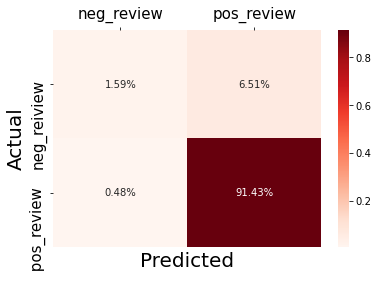

In [70]:
#Naive Bayes
#Bow model multinomial

multi_nb = MultinomialNB()
multi_nb.fit(review_train_v,ytrain)
y_pred_v = multi_nb.predict(review_test_v)


print_result(ytest, y_pred_v)
print_report(ytest, y_pred_v)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.92      1.00      0.96       579

    accuracy                           0.92       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.84      0.92      0.88       630

Accuracy Score:0.919047619047619
F1 Score:0.9578163771712159
AUCROC Score:0.5


C:\Users\Rajesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


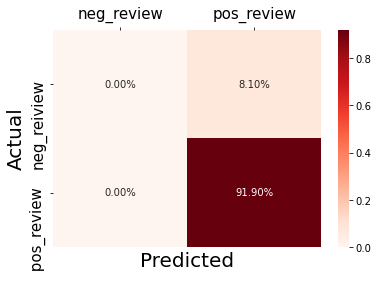

In [71]:
#Naive Bayes
#TFIDF model multinomial
nb = MultinomialNB()
nb.fit(review_train_tfd,ytrain)
ypred_nb_tfd = nb.predict(review_test_tfd)

print_result(ytest, ypred_nb_tfd)
print_report(ytest, ypred_nb_tfd)

**RANDOM FOREST**

              precision    recall  f1-score   support

           0       0.82      0.35      0.49        51
           1       0.95      0.99      0.97       579

    accuracy                           0.94       630
   macro avg       0.88      0.67      0.73       630
weighted avg       0.94      0.94      0.93       630

Accuracy Score:0.9412698412698413
F1 Score:0.9688289806234204
AUCROC Score:0.6730163568017881


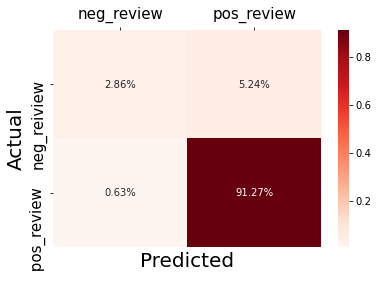

In [72]:
#random forest
#BOW model
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(review_train_v,ytrain)
predictions = text_classifier.predict(review_test_v)

print_result(ytest, predictions)
print_report(ytest, predictions)


              precision    recall  f1-score   support

           0       1.00      0.29      0.45        51
           1       0.94      1.00      0.97       579

    accuracy                           0.94       630
   macro avg       0.97      0.65      0.71       630
weighted avg       0.95      0.94      0.93       630

Accuracy Score:0.9428571428571428
F1 Score:0.9698492462311558
AUCROC Score:0.6470588235294117


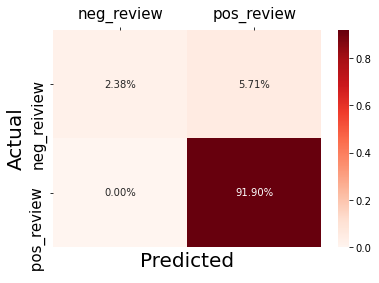

In [73]:
#TFIDF model randomforest

text_classifier.fit(review_train_tfd,ytrain)
predictions = text_classifier.predict(review_test_tfd)

print_result(ytest, predictions)
print_report(ytest, predictions)

**SVM**

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        51
           1       0.96      0.97      0.97       579

    accuracy                           0.94       630
   macro avg       0.80      0.77      0.78       630
weighted avg       0.94      0.94      0.94       630

Accuracy Score:0.9380952380952381
F1 Score:0.9664660361134996
AUCROC Score:0.7696332418977954


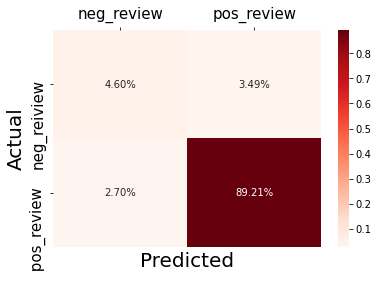

In [74]:
#Bow model SVM
svm = SVC(kernel='linear')
svm.fit(review_train_v,ytrain)
ypred_svm = svm.predict(review_test_v)

print_result(ytest, ypred_svm)
print_report(ytest, ypred_svm)

              precision    recall  f1-score   support

           0       0.73      0.22      0.33        51
           1       0.93      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.83      0.60      0.65       630
weighted avg       0.92      0.93      0.91       630

Accuracy Score:0.9301587301587302
F1 Score:0.9631490787269682
AUCROC Score:0.6043889058213959


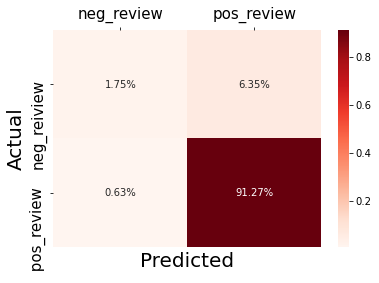

In [75]:
#TFIDF model SVM
svm.fit(review_train_tfd,ytrain)
ypred_tfd_svm = svm.predict(review_test_tfd)

print_result(ytest, ypred_tfd_svm)
print_report(ytest, ypred_tfd_svm)


**LOGISTIC REGRESSION**

              precision    recall  f1-score   support

           0       0.47      0.61      0.53        51
           1       0.96      0.94      0.95       579

    accuracy                           0.91       630
   macro avg       0.72      0.77      0.74       630
weighted avg       0.92      0.91      0.92       630

Accuracy Score:0.9126984126984127
F1 Score:0.9518810148731408
AUCROC Score:0.7736970435842732


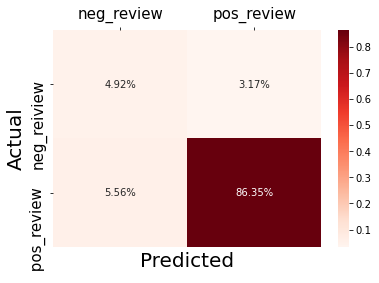

In [76]:
#BOW MODEL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(review_train_v,ytrain)
ypred_lr = svm.predict(review_test_v)

print_result(ytest, ypred_lr)
print_report(ytest, ypred_lr)


              precision    recall  f1-score   support

           0       0.73      0.22      0.33        51
           1       0.93      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.83      0.60      0.65       630
weighted avg       0.92      0.93      0.91       630

Accuracy Score:0.9301587301587302
F1 Score:0.9631490787269682
AUCROC Score:0.6043889058213959


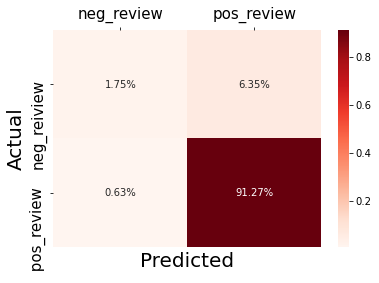

In [77]:
#TFIDF MODEL
lr.fit(review_train_tfd,ytrain)
ypred_lr_tfd = svm.predict(review_test_tfd)

print_result(ytest, ypred_lr_tfd)
print_report(ytest, ypred_lr_tfd)

**VERIFYING THE RESULTS**

In [89]:
#Verifying the results
def get_row_index(ytest,row_number):
    t_text = ytest.reset_index()
    return t_text['index'][row_number]

i=7
print('Predicted Review:', "Positive" if ytest.iloc[i] else "Negative")
print('Actual Review:',reviews[get_row_index(ytest,i)])

Predicted Review: Positive
Actual Review: wellmade productecho spot white
